In [1]:
import statsmodels.api as sm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
url = 'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'
dataset = pd.read_html(url, header = 0)

In [4]:
dataset = dataset[2]

In [5]:
dataset.head()

,Year,United States Census Bureau (2017)[29],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[25],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
0,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.to_excel('World_Population_Estimate.xlsx')

In [7]:
#to_drop = ['Population Reference Bureau (1973–2016)[15]', 'United Nations Department of Economic and Social Affairs (2015)[16]', 'Maddison (2008)[17]', 'HYDE (2007)[25]', 'Tanton (1994)[19]', 'Biraben (1980)[20]', 'McEvedy & Jones (1978)[21]', 'Thomlinson (1975)[22]', 'Durand (1974)[23]','Clark (1967)[24]']
#dataset.drop(to_drop, inplace=True, axis = 1)

In [8]:
#dataset

In [9]:
dataset_for_analysis = dataset[['Year', 'United States Census Bureau (2017)[29]']]

In [10]:
dataset_for_analysis.head()

,Year,United States Census Bureau (2017)[29]
0,1950,2557628654
1,1951,2594939877
2,1952,2636772306
3,1953,2682053389
4,1954,2730228104


In [11]:
dataset_for_analysis = dataset_for_analysis.dropna()

In [12]:
dataset_for_analysis.describe()

,Year,United States Census Bureau (2017)[29]
count,67.000000,6.700000e+01
mean,1983.000000,4.778290e+09
std,19.485037,1.469389e+09
min,1950.000000,2.557629e+09
25%,1966.500000,3.455506e+09
50%,1983.000000,4.695737e+09
75%,1999.500000,6.050323e+09
max,2016.000000,7.325997e+09


## Data Exploration

In [13]:
y = dataset_for_analysis['United States Census Bureau (2017)[29]'] # Defining the independent and dependent variables
x1 = dataset_for_analysis['Year']

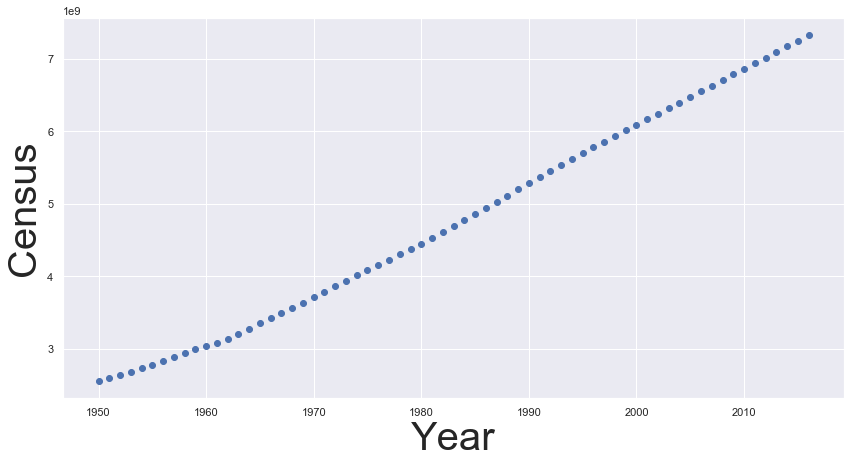

In [14]:
fig, ax = plt.subplots(figsize = (14,7))
plt.scatter(x1,y)
plt.title('')
plt.xlabel('Year', fontsize=40)
plt.ylabel('Census', fontsize=40)
plt.show()

## Regression Model

In [15]:
y = dataset_for_analysis['United States Census Bureau (2017)[29]'] # Defining the independent and dependent variables
x1 = dataset_for_analysis['Year']

In [16]:
#sns.regplot(x="Year", y="United States Census Bureau (2017)[29]", data=dataset_for_analysis);

### Using Ordinary Least Squares

In [17]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     United States Census Bureau (2017)[29]   R-squared:                       0.997
Model:                                                OLS   Adj. R-squared:                  0.997
Method:                                     Least Squares   F-statistic:                 2.039e+04
Date:                                    Thu, 01 Oct 2020   Prob (F-statistic):           6.46e-83
Time:                                            15:19:15   Log-Likelihood:                -1316.1
No. Observations:                                      67   AIC:                             2636.
Df Residuals:                                          65   BIC:                             2641.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.445e+11   1.05e+09   -138.232      0.000   -1.47e+11   -1.42e+11
Year        7.529e+07   5.27e+05    142.809      0.000    7.42e+07    7.63e+07
==============================================================================
Omnibus:                       10.660   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.575
Skew:                           0.895   Prob(JB):                      0.00505
Kurtosis:                       3.766   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Explanation of table
## With our R- squared value of 0.997, this shows our model explains the variability of the data to a large extent

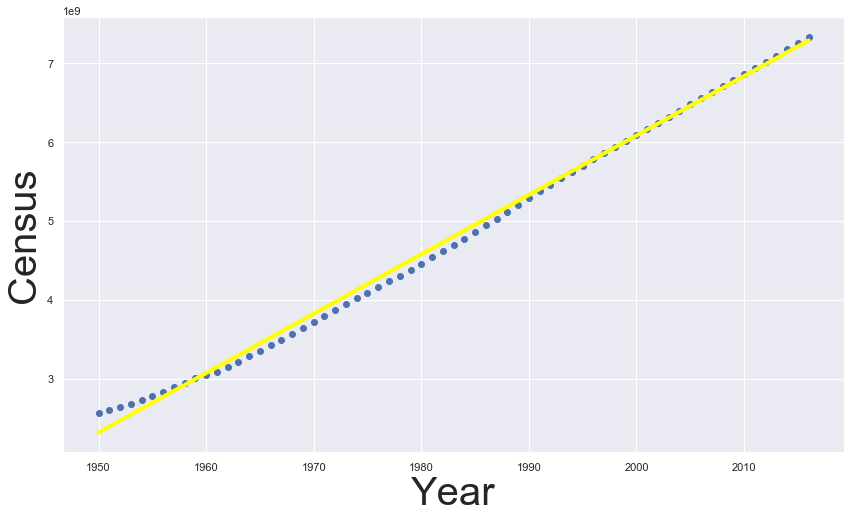

In [18]:
fig, ax = plt.subplots(figsize = (14,8))
plt.scatter(x1,y)
yhat = 75290000*x1 - 144500000000 # census = 75290000 * x1 + (-144500000000)
fig = plt.plot(x1, yhat, lw=4, c='yellow', label = 'regression line')
plt.xlabel('Year', fontsize=40)
plt.ylabel('Census', fontsize=40)
plt.show()


# Interpretation of Regression Analysis

## From the analysis, we calculated the values for our constants in the regression equation:
### yhat = -144500000000 + 75290000 * x1
### Where;
### x1 = Year
### yhat = Census
## This equation can be use to predict the World's population
